In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [12]:
# Load the dataset
file_path = '/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
data = pd.read_csv(file_path)


In [13]:
# Clean column names by removing extra spaces
data.columns = data.columns.str.replace(' ', '')


print(data.columns)

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

Handle Missing and Infinite Values
Action: Remove rows with missing values or fill them with appropriate statistics (mean, median).

In [14]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))



First 10 rows of the dataset:
   DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0               22       1266342               41                    44   
1               22       1319353               41                    44   
2               22           160                1                     1   
3               22       1303488               41                    42   
4            35396            77                1                     2   
5               22           244                1                     1   
6               22       1307239               41                    40   
7            60058            82                1                     2   
8               22           171                1                     1   
9               22           210                1                     1   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                     2664                     6954                 4

In [16]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [17]:
print(data.isnull().sum())



DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
                          ..
IdleMean                   0
IdleStd                    0
IdleMax                    0
IdleMin                    0
Label                      0
Length: 79, dtype: int64


2.Encode Labels Action: Convert Label to numeric format, e.g., BENIGN = 0 and ATTACK = 1.

In [18]:
data['Label'] = data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


In [19]:
print(data['Label'].value_counts())


Label
1    158804
0    127292
Name: count, dtype: int64


Drop Irrelevant or Redundant Columns Action: Remove columns that don’t contribute to the analysis (e.g., IDs or IP addresses).

In [20]:
irrelevant_columns = ['FlowID', 'SourceIP', 'DestinationIP']
data = data.drop(columns=irrelevant_columns, errors='ignore')

In [21]:
print(data.columns)

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

Handle Correlated Features (Optional) Why: Highly correlated features add redundancy and can reduce model performance. How: Calculate correlations and remove one feature from pairs with high correlation (>0.9).

In [22]:
correlation_matrix = data.corr()
high_corr = correlation_matrix[correlation_matrix > 0.9]
print(high_corr)

                         DestinationPort  FlowDuration  TotalFwdPackets  \
DestinationPort                      1.0           NaN              NaN   
FlowDuration                         NaN           1.0              NaN   
TotalFwdPackets                      NaN           NaN         1.000000   
TotalBackwardPackets                 NaN           NaN         0.962078   
TotalLengthofFwdPackets              NaN           NaN              NaN   
...                                  ...           ...              ...   
IdleMean                             NaN           NaN              NaN   
IdleStd                              NaN           NaN              NaN   
IdleMax                              NaN           NaN              NaN   
IdleMin                              NaN           NaN              NaN   
Label                                NaN           NaN              NaN   

                         TotalBackwardPackets  TotalLengthofFwdPackets  \
DestinationPort          

Scale Features Why: Ensure all numerical features have the same scale for models sensitive to feature magnitudes (e.g., SVM, KNN).

In [23]:
from sklearn.preprocessing import StandardScaler
numeric_features = data.select_dtypes(include=[float, int])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
data[numeric_features.columns] = scaled_features


In [24]:
print(data.describe())


       DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
count     2.860960e+05  2.860960e+05     2.860960e+05          2.860960e+05   
mean      5.960596e-18 -1.589492e-18     3.655832e-17          7.947461e-18   
std       1.000002e+00  1.000002e+00     1.000002e+00          1.000002e+00   
min      -5.223313e-01 -2.455363e-01    -1.268108e-01         -1.244904e-01   
25%      -5.171183e-01 -2.455337e-01    -1.268108e-01         -8.916347e-02   
50%      -4.501311e-01 -2.455327e-01    -1.268108e-01         -8.916347e-02   
75%      -7.523445e-02 -2.444498e-01    -7.560110e-02         -5.383656e-02   
max       3.738585e+00  5.224682e+00     1.595449e+02          1.282888e+02   

       TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
count             2.860960e+05             2.860960e+05       286096.000000   
mean              7.947461e-18            -7.947461e-18            0.000000   
std               1.000002e+00             1.000002

6.Train-Test Split--?10% 90%-improor.? optmi.?

In [25]:
from sklearn.model_selection import train_test_split
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")


Training set size: 228876, Test set size: 57220


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286096 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          286096 non-null  float64
 1   FlowDuration             286096 non-null  float64
 2   TotalFwdPackets          286096 non-null  float64
 3   TotalBackwardPackets     286096 non-null  float64
 4   TotalLengthofFwdPackets  286096 non-null  float64
 5   TotalLengthofBwdPackets  286096 non-null  float64
 6   FwdPacketLengthMax       286096 non-null  float64
 7   FwdPacketLengthMin       286096 non-null  float64
 8   FwdPacketLengthMean      286096 non-null  float64
 9   FwdPacketLengthStd       286096 non-null  float64
 10  BwdPacketLengthMax       286096 non-null  float64
 11  BwdPacketLengthMin       286096 non-null  float64
 12  BwdPacketLengthMean      286096 non-null  float64
 13  BwdPacketLengthStd       286096 non-null  float64
 14  FlowBytes

In [28]:
data.Label.nunique()

2

In [29]:
data.Label.value_counts()

,count
Label,
0.895303,158804
-1.116941,127292


In [30]:
# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']

In [31]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)

In [32]:
features = features.select_dtypes(include=[float, int])

In [33]:
len(features)


286096

In [34]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,-0.520898,-0.187809,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
1,-0.520898,-0.185393,1.921576,1.429893,1.301913,0.083183,1.143000,-0.427193,0.520360,0.726763,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
2,-0.520898,-0.245528,-0.126811,-0.089163,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
3,-0.520898,-0.186116,1.921576,1.359240,1.336198,0.076910,1.143000,-0.427193,0.540263,0.729026,...,1.493893,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
4,1.784164,-0.245532,-0.126811,-0.053837,-0.125195,-0.053141,-0.247378,-0.427193,-0.308105,-0.209924,...,-0.116102,0.364318,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286462,-0.493464,-0.236595,2.331253,1.889143,0.587823,2.021738,1.490594,-0.427193,0.038237,0.711439,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286463,-0.493464,-0.228285,2.331253,1.959797,0.584609,1.993352,1.490594,-0.427193,0.036676,0.711676,...,1.896392,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286464,-0.493464,-0.238160,3.406657,3.514181,0.639251,4.179364,1.490594,-0.427193,-0.048179,0.563765,...,3.036806,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561
286465,-0.493464,-0.239023,2.382463,2.065778,0.587823,2.106896,1.490594,-0.427193,0.031310,0.702577,...,1.963476,-1.133141,-0.073218,-0.08755,-0.106105,-0.05145,-0.184749,-0.050323,-0.185562,-0.179561


In [35]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [37]:
round(data.shape[0]*80/100)

228877

In [38]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [39]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")

Length of X_train: 228877
Length of y_train: 228877
Length of X_test: 57219
Length of y_test: 57219
Final Length of X_test: 57219
Final Length of y_test: 57219


In [59]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)

print("Number of anomalies detected:", (y_pred == -1).sum())

iso_forest_predict = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Number of anomalies detected: 3102
Accuracy in separating Outliers: 0.567206697076146
Value: -1, Count: 3102
Value: 1, Count: 54117


In [66]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=600, random_state=42, oob_score=True)
random_forest.fit(X_train, y_train)

# Get probabilities for the test set
y_prob = random_forest.predict_proba(X_test)

# Treat low probabilities as anomalies
anomaly_threshold = 0.1  # Adjust based on your dataset
anomalies = np.max(y_prob, axis=1) < anomaly_threshold

# Count anomalies
print("Number of anomalies detected:", np.sum(anomalies))

# Optionally, map anomalies to a binary indicator
y_pred = np.where(anomalies, 1, 0)


Number of anomalies detected: 0


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=600, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in classifying data:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Analyze unique values in predictions
unique_values, counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Accuracy in classifying data: 0.9988814904140233

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35519
           1       1.00      1.00      1.00     21700

    accuracy                           1.00     57219
   macro avg       1.00      1.00      1.00     57219
weighted avg       1.00      1.00      1.00     57219


Confusion Matrix:
[[35519     0]
 [   64 21636]]
Value: 0, Count: 35583
Value: 1, Count: 21636


In [46]:
# @title Default title text
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

y_pred = ocsvm.predict(X_test)


print("Number of anomalies detected:", (y_pred == -1).sum())

Number of anomalies detected: 1079


In [64]:
from sklearn.metrics import accuracy_score

# Convert One-Class SVM predictions to 0 and 1: -1 for outliers and 1 for inliers
svm_predict = np.where(y_pred == -1, 1, 0)  # Replace -1 with 1 and 1 with 0

# Convert true labels to 0 and 1 as well
y_test_mapped = np.where(y_test == 'PortScan', 1, 0)

accuracy = accuracy_score(y_test_mapped, svm_predict)
print("Accuracy in separating Outliers:", accuracy)

Accuracy in separating Outliers: 0.9464164001468044


In [65]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Train One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

# Make predictions (-1 for anomalies, 1 for normal)
y_pred = ocsvm.predict(X_test)

# Post-process predictions (convert -1 to 1 for anomalies)
ocsvm_predict = np.where(y_pred == -1, 1, 0)

# Print number of anomalies detected
print("Number of anomalies detected:", (y_pred == -1).sum())

# Model Evaluation
# Assuming y_test is binary (0 for normal, 1 for anomalies)
accuracy = accuracy_score(y_test, ocsvm_predict)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, ocsvm_predict, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, ocsvm_predict)
print("\nConfusion Matrix:")
print(cm)


Number of anomalies detected: 1056
Accuracy: 0.603907792866006

Classification Report:
              precision    recall  f1-score   support

      Normal       0.61      0.97      0.75     35519
     Anomaly       0.04      0.00      0.00     21700

    accuracy                           0.60     57219
   macro avg       0.33      0.49      0.38     57219
weighted avg       0.40      0.60      0.47     57219


Confusion Matrix:
[[34509  1010]
 [21654    46]]


In [60]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.03, random_state=42)
iso_forest.fit(X_train)

# Predictions
y_pred = iso_forest.predict(X_test)

# Post-process predictions
iso_forest_predict = np.where(y_pred == -1, 1, 0)

# Evaluation
accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, iso_forest_predict, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, iso_forest_predict)
print("\nConfusion Matrix:\n", cm)

# Unique Counts
unique_values, counts = np.unique(y_pred, return_counts=True)
print("\nPredicted Label Distribution:")
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Accuracy in separating Outliers: 0.567206697076146

Classification Report:
              precision    recall  f1-score   support

      Normal       0.60      0.91      0.72     35519
     Anomaly       0.01      0.00      0.00     21700

    accuracy                           0.57     57219
   macro avg       0.30      0.46      0.36     57219
weighted avg       0.37      0.57      0.45     57219


Confusion Matrix:
 [[32436  3083]
 [21681    19]]

Predicted Label Distribution:
Value: -1, Count: 3102
Value: 1, Count: 54117


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'contamination': [0.01, 0.03, 0.05],
    'max_features': [0.5, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    IsolationForest(random_state=42),
    param_grid,
    scoring='accuracy',
    cv=5
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
iso_forest = grid_search.best_estimator_


Best Parameters: {'contamination': 0.01, 'max_features': 1.0, 'n_estimators': 300}


In [63]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

iso_forest = IsolationForest(n_estimators=600, contamination=0.03, random_state=42)
iso_forest.fit(X_train)

# Predictions
y_pred = iso_forest.predict(X_test)

# Post-process predictions
iso_forest_predict = np.where(y_pred == -1, 1, 0)

# Evaluation
accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, iso_forest_predict, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, iso_forest_predict)
print("\nConfusion Matrix:\n", cm)

# Unique Counts
unique_values, counts = np.unique(y_pred, return_counts=True)
print("\nPredicted Label Distribution:")
for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Accuracy in separating Outliers: 0.5678009052936962

Classification Report:
              precision    recall  f1-score   support

      Normal       0.60      0.91      0.72     35519
     Anomaly       0.01      0.00      0.00     21700

    accuracy                           0.57     57219
   macro avg       0.30      0.46      0.36     57219
weighted avg       0.37      0.57      0.45     57219


Confusion Matrix:
 [[32471  3048]
 [21682    18]]

Predicted Label Distribution:
Value: -1, Count: 3066
Value: 1, Count: 54153


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)


Accuracy: 0.9988989671263042

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     35519
     Anomaly       1.00      1.00      1.00     21700

    accuracy                           1.00     57219
   macro avg       1.00      1.00      1.00     57219
weighted avg       1.00      1.00      1.00     57219


Confusion Matrix:
[[35519     0]
 [   63 21637]]

ROC AUC Score: 0.999457749165988


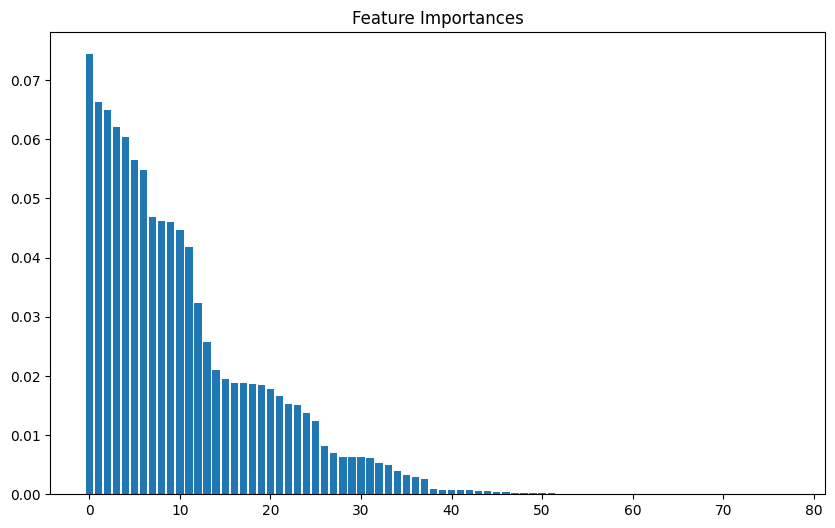

In [68]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.show()


In [69]:
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.9988989671263042


In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred, pos_label=1)  # For anomaly class
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)


Precision: 1.0
Recall: 0.9970967741935484
F1-Score: 0.9985462768534971
ROC AUC Score: 0.999457749165988


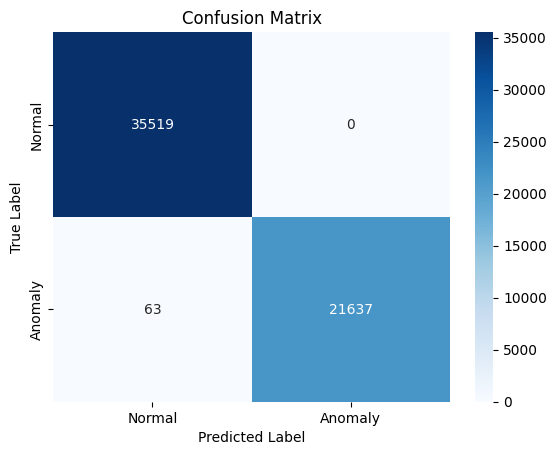

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [72]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99809944 1.         1.         1.         1.        ]
Mean Accuracy: 0.9996198881509961
